# Perceptron 感知机
> Perceptron design by is generally considered the **origin** of the **neural networks** and **modern machine learning**(*Python Machine Learning*, *Pattern Recognition and Machine Learning*). 
> This note is my(dddsx259) studying note about it.        

## 1. Definitions
Consider a **neuron** node. It takes a array/vector as input and output a **decision function** to binary classify the input:
+ INPUT: a vector $x$:
$$
x=
\begin{bmatrix}
x_1\\
x_2\\
\dots\\
x_m
\end{bmatrix}
$$
+ OUTPUT: a classification result(as decision function)



### Definition 1: Decision function
$$
\Phi(z)=
\begin{cases}
&1 &if z\ge\theta\\
&-1 &otherwise 
\end{cases}
$$
The $\theta$ is **threshold**, the $z$ is the **net input**:
$$
z=\vec{w}\cdot\vec{x}\ or\ \vec{w}^T\vec{x}
$$
Where $\vec{w}$ is the parameters of the perceptron model.

We cna also simplize the notation by bring the threshold $\theta$ to the $w_0x_0$:
$$
z=w_0x_0+w_1x_1+\dots+w_mx_m\\
\Phi(z)=
\begin{cases}
&1 &if z\ge0\\
&-1 &otherwise 
\end{cases}
$$
where $w_0$ called **bias unit** $=-\theta$ and $x_0 = 1$
i.e. Actually we can represent the input $z$:
$$
z = \vec{w}^T\vec{x} - \theta = \vec{w}^T\vec{x} + b
$$
We called $b$ the **bais**

After those definition, we next consider the parameter update rule of perceptron:

## 2. Perceptron Learning Rule
The core idea of perceptron is **adjust the parameter** by **correctness of each sample**. For the i-th sample $x^{(i)}$, we follow the process below:
1. Initialize all parameters
   1. Hyper-parameter:
      1. **Learning rate** $\eta$
   2. Self-learning Parameters:
      1. Weights: $\vec{w}
      2. Bias: $\theta$
2. Compute the predict output value: $\hat{y}T{(i)}\in\{+1,-1\}$
3. Update the weights, follow:
   1. $$\vec{w}\leftarrow\vec{w}+\Delta \vec{w}$$
      1. We have:$$\Delta \vec{w}=\eta(y^{(i)}-\hat{y}^{(i)})\vec{x}^{(i)}$$
      2. Where:
         1. $\eta$ is the **learning rate**
         2. $y^{(i)}$ is the true class of the sample $x^{(i)}$
         3. Note that the only value range of $y$ is $\{+1,-1\}$, so actually $\Delta \vec{w}=\pm 2\eta\vec{x}^{(i)}$
   2. $$b \leftarrow b + \Delta b$$
      1. Same asn the update rule of $\vec{w}$, we have: $$\Delta b=\eta(y^{(i)}-\hat{y}^{(i)})$$
4. Repeat the above step for many round.

# 3. Parameters
## 3.1 Hyper-parameters
The **hyper-parameters** is the parameter that we fix the value before model training, and never change. It based on the experience of the trainer. The hyper parameter in this model is the **learning rate**.
+ If the learning rate is too small, then each round of training's influnence on the parameter will be small so that we need more time to train the model
+ If the learning rate is too huge, then each sample can make a big change to the weight, so that is may only fit some samples.
  

## 3.2 Parameter
The parameters is the **learnable/model/internal parameters**. After we set the initial value of them, it was change by model itself.

# 4. Mathematic perspective
Perceptron is one of the **linear classification algorithm**. That it can divide the input data into two part by a **plane in high dimension space**. In our algorithm, is the vector space: $\mathbb{R}^{m+1}$. Speak mathematically, the **weight** vector is a unit vector on the **hyperplane**, the positive or negative result of the vector product $\vec{w}^T\vec{x}$ determine the point in which side of the space divided by the hyperplane. 

Each time when a wrong classification happen (i.e. $y^{(i)}-\hat{y}^{(i)} = \pm 2$) , then the update of the patrameter is actually move the hyperplane to the sample point. 

# 5. Code demonstration
We use the [dataset **Iris**](https://archive.ics.uci.edu/dataset/53/iris), from UCI Machine Learning Repository. The first 100 class


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For demonstration, we only use the first 100 class labels, where ghe first 50 is Iris-setosa flowers and last 50 is Iris-versicolor flowers.

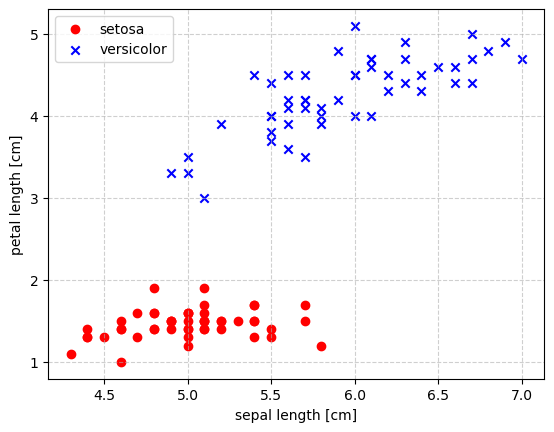

In [7]:
y = df.iloc[0:100, 4] #The 4-th column is labels
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# Visualization:

plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

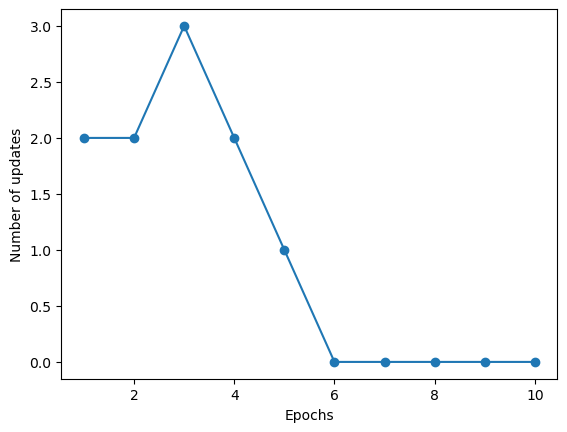

/var/folders/y5/ffgvr_j12zlg_1383nvpg6300000gn/T/ipykernel_82981/3896140257.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


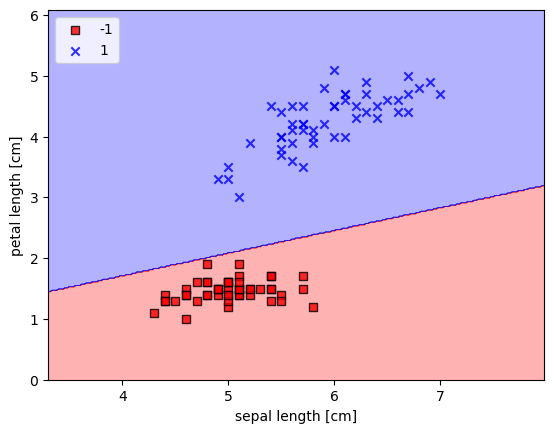

In [8]:
class Perceptron:
    def __init__(self, eta: float = 0.01, n_iter: int = 50, random_state: int = 42)->None:
        # Initialize the hyperparameters
        self.eta = eta  # Learning Rate
        self.n_iter = n_iter    # Number of train round
        self.random_state = random_state    # Random seed(To ensure the result can be reproducted)
    
    def fit(self, X, y) -> Perceptron:
        rgen = np.random.RandomState(self.random_state) #Create a random generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # Randomly genreate the weight
        self.errors_ = []   # Record the error of each round during training
        for _ in range(self.n_iter):    #Start training
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)


plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, 
                    c=colors[idx],  marker=markers[idx],
                    label=cl, edgecolor='black')
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

------

This note's structure based on HKU COMP3314 Lec2. With many extra content from:
> UCB CS189    
> AI generate